# Figure S - variance partitioning

In [1]:
import glob
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util.path import derivpath
from util.plot import formatenc
from utils import load_pickle

plt.style.use("presentation.mplstyle")
colors = sns.color_palette()
RED, BLUE = colors[3], colors[0]
YELLOW, GRAY = "goldenrod", colors[7]  # goldenrod: 218., 165.,  32.
RED_CMAP = sns.light_palette(RED, as_cmap=True)
BLUE_CMAP = sns.light_palette(BLUE, as_cmap=True)
fs1c = (2.24, 2.24 / (4 / 3))
fs2c = (4.76, 4.76 / (4 / 3))
fs3c = (7.24, 7.24 / (4 / 3))
gr = 1 - np.sqrt(5) / 2 + 0.5

In [2]:
# Options
root = "../dataset/derivatives/encoding_bands/"
Ss = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12]
modes = ["prod", "comp"]

tmax, window, jump = 4, 0.250, 0.03125 * 2
lags = np.arange(-tmax, tmax + jump, jump)

modelname = 'model-gpt2-xl_maxlen-1024_layer-24_reg-l2'

In [3]:
results = {}

In [4]:
# Load actual results
def load_model_results(modelname):
    for sub in Ss:
        for mode in modes:
            actual_pickle = glob.glob(
                f"{root}sub-{sub:02d}/{modelname}/sub-{sub:02d}_task-conversation_encoding_bands_mode-{mode}_band-highgamma_nfolds-10.pkl"
            )
            if len(actual_pickle):
                print(sub, mode, modelname)
                with open(actual_pickle[0], "rb") as f:
                    result = pickle.load(f)
                    del result["args"]
                    del result["preds"]
                    results[(sub, mode, modelname)] = result

In [5]:
load_model_results(modelname)

1 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
1 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
2 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
2 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
3 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
3 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
4 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
4 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
5 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
5 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
6 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
6 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
9 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
9 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
10 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
10 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
11 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
11 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2
12 prod model-gpt2-xl_maxlen-1024_layer-24_reg-l2
12 comp model-gpt2-xl_maxlen-1024_layer-24_reg-l2


In [6]:
load_model_results('2banded_reg-l2')

1 prod 2banded_reg-l2
1 comp 2banded_reg-l2
2 prod 2banded_reg-l2
2 comp 2banded_reg-l2
3 prod 2banded_reg-l2
3 comp 2banded_reg-l2
4 prod 2banded_reg-l2
4 comp 2banded_reg-l2
5 prod 2banded_reg-l2
5 comp 2banded_reg-l2
6 prod 2banded_reg-l2
6 comp 2banded_reg-l2
9 prod 2banded_reg-l2
9 comp 2banded_reg-l2
10 prod 2banded_reg-l2
10 comp 2banded_reg-l2
11 prod 2banded_reg-l2
11 comp 2banded_reg-l2
12 prod 2banded_reg-l2
12 comp 2banded_reg-l2


In [7]:
method, alpha = "fdr_bh", 0.01
datatype = f"method-{method}_alpha-{alpha}_lags-1"
sigmodelname = "model-gpt2-xl_maxlen-0_reg-l2_perm-phase"
p = derivpath(
    f"sub-all_model-{sigmodelname}.pkl",
    derivative="electrode-selection",
    datatype=datatype,
)
sigmasks = load_pickle(p)
sigmasks = {key[:2]: value for key, value in sigmasks.items()}
nsig_elecs = sum([s.sum() for s in sigmasks.values()])
nsig_elecs, sigmasks.keys()

(384,
 dict_keys([(1, 'prod'), (1, 'comp'), (2, 'prod'), (2, 'comp'), (3, 'prod'), (3, 'comp'), (4, 'prod'), (4, 'comp'), (5, 'prod'), (5, 'comp'), (6, 'prod'), (6, 'comp'), (9, 'prod'), (9, 'comp'), (10, 'prod'), (10, 'comp'), (11, 'prod'), (11, 'comp'), (12, 'prod'), (12, 'comp')]))

# plot overall variance partitioning

In [70]:
prod_r_sub_full = []
comp_r_sub_full = []
prod_r_sub_2 = []
comp_r_sub_2 = []

for sub in Ss:
    mask = sigmasks[(sub, 'prod')]
    prod_r_sub_full.append(np.stack(results[(sub, 'prod', 'model-gpt2-xl_maxlen-1024_layer-24_reg-l2')]['corrs']).sum(1).mean(0)[mask])
    prod_r_sub_2.append(np.stack(results[(sub, 'prod', '2banded_reg-l2')]['corrs']).sum(1).mean(0)[mask])

    mask = sigmasks[(sub, 'comp')]
    comp_r_sub_full.append(np.stack(results[(sub, 'comp', 'model-gpt2-xl_maxlen-1024_layer-24_reg-l2')]['corrs']).sum(1).mean(0)[mask])
    comp_r_sub_2.append(np.stack(results[(sub, 'comp', '2banded_reg-l2')]['corrs']).sum(1).mean(0)[mask])

prod_r_avg_full = np.vstack(prod_r_sub_full).mean(0)
prod_r_avg_2 = np.vstack(prod_r_sub_2).mean(0)

comp_r_avg_full = np.vstack(comp_r_sub_full).mean(0)
comp_r_avg_2 = np.vstack(comp_r_sub_2).mean(0)

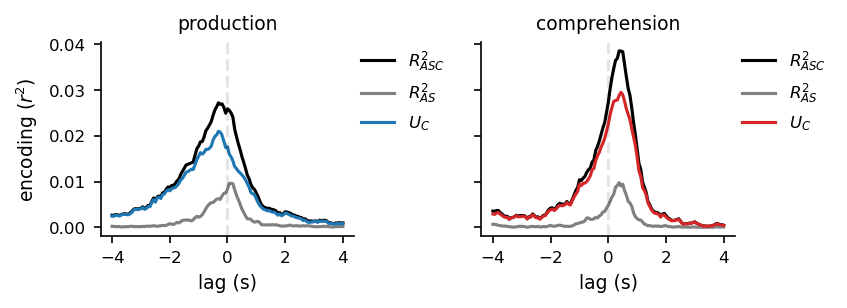

In [71]:
w = 7.24 / 2 - 0.5
fig, axes = plt.subplots(1, 2, figsize=(w * 1.75, 1.68), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.5)

ax = axes[0]
ax.plot(lags, np.square(prod_r_avg_full), label=r'$R^2_{ASC}$', c='k')
ax.plot(lags, np.square(prod_r_avg_2), label=r'$R^2_{AS}$', c='gray')
ax.plot(lags, np.square(prod_r_avg_full) - np.square(prod_r_avg_2), label=r'$U_C$', c=BLUE)
formatenc(ax)
ax.set_title("production")
ax.set(xlabel="lag (s)", ylabel="encoding ($r^2$)")
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0.0)

ax = axes[1]
ax.plot(lags, np.square(comp_r_avg_full), label=r'$R^2_{ASC}$', c='k')
ax.plot(lags, np.square(comp_r_avg_2), label=r'$R^2_{AS}$', c='gray')
ax.plot(lags, np.square(comp_r_avg_full) - np.square(comp_r_avg_2), label=r'$U_C$', c=RED)
formatenc(ax)
ax.set_title("comprehension")
ax.set(xlabel="lag (s)")
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0.0)


fig.show()

# plot VP for specific ROI

In [8]:
rois = ['ST', 'mSTG', 'cSTG', 'rSTG', 'BSTS']
rois = ['PREC', 'PSTC']

In [9]:
prod_r_sub_full = []
comp_r_sub_full = []
prod_r_sub_2 = []
comp_r_sub_2 = []

for sub in Ss:
    mask = sigmasks[(sub, 'prod')].copy()
    mask &= np.in1d(results[(sub, 'prod', modelname)]['rois'], rois)
    print(sub, mask.sum())
    if mask.any():
        prod_r_sub_full.append(np.stack(results[(sub, 'prod', 'model-gpt2-xl_maxlen-1024_layer-24_reg-l2')]['corrs']).sum(1).mean(0)[mask])
        prod_r_sub_2.append(np.stack(results[(sub, 'prod', '2banded_reg-l2')]['corrs']).sum(1).mean(0)[mask])

    mask = sigmasks[(sub, 'comp')].copy()
    mask &= np.in1d(results[(sub, 'comp', modelname)]['rois'], rois)
    print(sub, mask.sum())
    if mask.any():
        comp_r_sub_full.append(np.stack(results[(sub, 'comp', 'model-gpt2-xl_maxlen-1024_layer-24_reg-l2')]['corrs']).sum(1).mean(0)[mask])
        comp_r_sub_2.append(np.stack(results[(sub, 'comp', '2banded_reg-l2')]['corrs']).sum(1).mean(0)[mask])

prod_r_avg_full = np.vstack(prod_r_sub_full).mean(0)
prod_r_avg_2 = np.vstack(prod_r_sub_2).mean(0)

comp_r_avg_full = np.vstack(comp_r_sub_full).mean(0)
comp_r_avg_2 = np.vstack(comp_r_sub_2).mean(0)

1 5
1 4
2 11
2 1
3 4
3 4
4 6
4 2
5 2
5 1
6 7
6 0
9 1
9 2
10 7
10 4
11 13
11 3
12 2
12 1


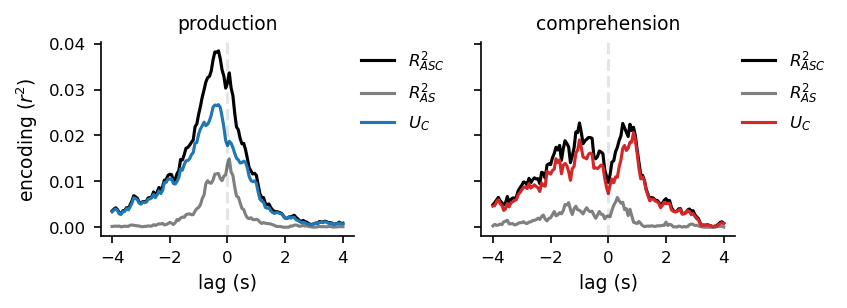

In [10]:
w = 7.24 / 2 - 0.5
fig, axes = plt.subplots(1, 2, figsize=(w * 1.75, 1.68), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.5)

ax = axes[0]
ax.plot(lags, np.square(prod_r_avg_full), label=r'$R^2_{ASC}$', c='k')
ax.plot(lags, np.square(prod_r_avg_2), label=r'$R^2_{AS}$', c='gray')
ax.plot(lags, np.square(prod_r_avg_full) - np.square(prod_r_avg_2), label=r'$U_C$', c=BLUE)
formatenc(ax)
ax.set_title("production")
ax.set(xlabel="lag (s)", ylabel="encoding ($r^2$)")
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0.0)

ax = axes[1]
ax.plot(lags, np.square(comp_r_avg_full), label=r'$R^2_{ASC}$', c='k')
ax.plot(lags, np.square(comp_r_avg_2), label=r'$R^2_{AS}$', c='gray')
ax.plot(lags, np.square(comp_r_avg_full) - np.square(comp_r_avg_2), label=r'$U_C$', c=RED)
formatenc(ax)
ax.set_title("comprehension")
ax.set(xlabel="lag (s)")
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=(1, 1), borderaxespad=0.0)

fig.show()